# Introduction to Data Science with Python 
## Natural Language Processing (NLP)

This notebook contains exercises for getting started with Natual Language Processing in Python. The main topics we will cover in this class are:

Introduction
1. newsgroups dataset
- Bag of words prediciton model

Advanced Language Processing with NLTK 
1. Tokenizing
- Stemming
- Speech Tagging
- Named Entity Recognition
- Term Frequency - Inverse Document Frequency
- Latent Dirichlet Allocation
- Regex

Other:
- Analysing data with the Alchemy API - http://www.alchemyapi.com/

## Bag of Words Prediction

We will use the [20 Newsgroup dataset](http://qwone.com/~jason/20Newsgroups/), which is provided by Scikit-Learn. This is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

We will restrict the analysis to 4 groups and will attempt to classify them starting from the corresponding text.

This is a typical example of text classification, where a data scientist's task is to train a model that can partition text in pre-defined categories. Other examples include sentiment analysis and topic assignment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

## 1. Data inspection

We have downloaded a few newsgroup categories and removed headers, footers and quotes.

Let's inspect them.

1. What data taype is `data_train`
> sklearn.datasets.base.Bunch
- Is it like a list? Or like a Dictionary? or what?
> Dict
- How many data points does it contain?
- Inspect the first data point, what does it look like?
> A blurb of text

In [ ]:
data_train.data

## 2. Bag of Words model

Let's train a model using a simple count vectorizer

[Text Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

1. Initialize a standard CountVectorizer and fit the training data (tokenization and occurrence counting)
- how big is the feature dictionary
- repeat eliminating english stop words
- is the dictionary smaller?
- transform the training data using the trained vectorizer
- what are the 20 words that are most common in the whole corpus?
- what are the 20 most common words in each of the 4 classes?
- evaluate the performance of a Lotistic Regression on the features extracted by the CountVectorizer
    - you will have to transform the test_set too. Be carefule to use the trained vectorizer, without re-fitting it
- try the following 3 modification:
    - restrict the max_features
    - change max_df and min_df
    - use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier
- for each of the above print a confusion matrix and investigate what gets mixed
> Anwer: not surprisingly if we reduce the feature space we lose accuracy
- print out the number of features for each model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvec = CountVectorizer()
cvec.fit(data_train['data'])

In [ ]:
len(cvec.get_feature_names())

In [ ]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(data_train['data'])
len(cvec.get_feature_names())

In [ ]:
X_train = pd.DataFrame(cvec.transform(data_train['data']).todense(),
                       columns=cvec.get_feature_names())

In [ ]:
y_train = data_train['target']

In [ ]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

In [ ]:
names = data_train['target_names']
names

In [ ]:
common_words = []
for i in xrange(4):
    word_count = X_train[y_train==i].sum(axis=0)
    print names[i], "most common words"
    cw = word_count.sort_values(ascending = False).head(20)
#     cw.to_csv('../../../5.2-lesson/assets/datasets/'+names[i]+'_most_common_words.csv')
    print cw
    common_words.extend(cw.index)
    print 

In [ ]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())

In [ ]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())
y_test = data_test['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in xrange(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=1000),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

In [ ]:
docm(y_test, y_pred, names)

In [ ]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=2000,
                                      min_df=0.01),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

In [ ]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      vocabulary=set(common_words)),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

## Advanced Natural Language Processing with NLTK

In [1]:
import nltk

For the following step, see the new window that will pop out elsewhere. The whole NLTK package is huge. Too big for all of you to download in class at the same time. Instead, select to install just the main packages and see of the lab runs. If not, use the downloader to get the additional missing packages.

In [2]:
# find pop-up window for downloader tool
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [3]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://en.wikipedia.org/wiki/Data_science")
b = BeautifulSoup(r.text, "lxml")
paragraphs = b.find("body").findAll("p")
text = ""
for paragraph in paragraphs:
    text += paragraph.text + " "
# Data Science corpus
text[:500]

u'Data science is an interdisciplinary field about processes and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, machine learning, data mining, and predictive analytics,[3] similar to Knowledge Discovery in Databases (KDD).   Data science employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, operations rese'

In [4]:
# tokenize into sentences
sentences = [sent for sent in nltk.sent_tokenize(text)]
sentences[:10]


[u'Data science is an interdisciplinary field about processes and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, machine learning, data mining, and predictive analytics,[3] similar to Knowledge Discovery in Databases (KDD).',
 u'Data science employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, operations research,[4] information science, and computer science, including signal processing, probability models, machine learning, statistical learning, data mining, database, data engineering, pattern recognition and learning, visualization, predictive analytics, uncertainty modeling, data warehousing, data compression, computer programming, artificial intelligence, and high performance computing.',
 u'Methods that scale to big data are of particular interest in data science, although the discipline 

In [5]:
# tokenize into words
tokens = [word for word in nltk.word_tokenize(text)]
tokens[:100]

[u'Data',
 u'science',
 u'is',
 u'an',
 u'interdisciplinary',
 u'field',
 u'about',
 u'processes',
 u'and',
 u'systems',
 u'to',
 u'extract',
 u'knowledge',
 u'or',
 u'insights',
 u'from',
 u'data',
 u'in',
 u'various',
 u'forms',
 u',',
 u'either',
 u'structured',
 u'or',
 u'unstructured',
 u',',
 u'[',
 u'1',
 u']',
 u'[',
 u'2',
 u']',
 u'which',
 u'is',
 u'a',
 u'continuation',
 u'of',
 u'some',
 u'of',
 u'the',
 u'data',
 u'analysis',
 u'fields',
 u'such',
 u'as',
 u'statistics',
 u',',
 u'machine',
 u'learning',
 u',',
 u'data',
 u'mining',
 u',',
 u'and',
 u'predictive',
 u'analytics',
 u',',
 u'[',
 u'3',
 u']',
 u'similar',
 u'to',
 u'Knowledge',
 u'Discovery',
 u'in',
 u'Databases',
 u'(',
 u'KDD',
 u')',
 u'.',
 u'Data',
 u'science',
 u'employs',
 u'techniques',
 u'and',
 u'theories',
 u'drawn',
 u'from',
 u'many',
 u'fields',
 u'within',
 u'the',
 u'broad',
 u'areas',
 u'of',
 u'mathematics',
 u',',
 u'statistics',
 u',',
 u'operations',
 u'research',
 u',',
 u'[',
 u'4',
 

In [6]:
# only keep tokens that start with a letter (using regular expressions)
import re
clean_tokens = [token for token in tokens if re.search('^[a-zA-Z]+', token)]
clean_tokens[:100]


[u'Data',
 u'science',
 u'is',
 u'an',
 u'interdisciplinary',
 u'field',
 u'about',
 u'processes',
 u'and',
 u'systems',
 u'to',
 u'extract',
 u'knowledge',
 u'or',
 u'insights',
 u'from',
 u'data',
 u'in',
 u'various',
 u'forms',
 u'either',
 u'structured',
 u'or',
 u'unstructured',
 u'which',
 u'is',
 u'a',
 u'continuation',
 u'of',
 u'some',
 u'of',
 u'the',
 u'data',
 u'analysis',
 u'fields',
 u'such',
 u'as',
 u'statistics',
 u'machine',
 u'learning',
 u'data',
 u'mining',
 u'and',
 u'predictive',
 u'analytics',
 u'similar',
 u'to',
 u'Knowledge',
 u'Discovery',
 u'in',
 u'Databases',
 u'KDD',
 u'Data',
 u'science',
 u'employs',
 u'techniques',
 u'and',
 u'theories',
 u'drawn',
 u'from',
 u'many',
 u'fields',
 u'within',
 u'the',
 u'broad',
 u'areas',
 u'of',
 u'mathematics',
 u'statistics',
 u'operations',
 u'research',
 u'information',
 u'science',
 u'and',
 u'computer',
 u'science',
 u'including',
 u'signal',
 u'processing',
 u'probability',
 u'models',
 u'machine',
 u'learning

In [7]:
# count the tokens
from collections import Counter
c = Counter(clean_tokens)

c.most_common(25)       # mixed case

[(u'and', 56),
 (u'data', 51),
 (u'the', 50),
 (u'of', 41),
 (u'science', 25),
 (u'in', 22),
 (u'to', 19),
 (u'Data', 18),
 (u'a', 16),
 (u'In', 14),
 (u'Science', 12),
 (u'for', 11),
 (u'as', 10),
 (u'is', 10),
 (u'The', 8),
 (u'term', 8),
 (u'on', 8),
 (u'his', 7),
 (u'are', 7),
 (u'software', 7),
 (u'analysis', 6),
 (u'was', 6),
 (u'scientists', 5),
 (u'such', 5),
 (u'their', 5)]

In [8]:
sorted(c.items())[:25]  # counts similar words separately
for item in sorted(c.items())[:25]:
    print item[0], item[1]


Action 1
Advanced 2
Although 1
American 1
An 1
Analytics 3
April 2
Areas 1
Assembly 1
Association 1
Board 1
Business 1
C. 1
C.F 1
CODATA 1
Carver 1
Century 2
Chandra 1
Classification 1
Cleveland 2
Collections 1
Columbia 1
Committee 1
Company 1
Computer 1


In [ ]:
###################
##### EXERCISE ####
###################

# Put each word in clean_tokens in lower case
# find the new word count of the lowered tokens
# Then show the top 10 words used in this corpus


### Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')


In [10]:
# example stemming
stemmer.stem('charge')
stemmer.stem('charging')
stemmer.stem('charged')

u'charg'

In [ ]:
# stem the tokens
stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]


In [ ]:
# count the stemmed tokens
c = Counter(stemmed_tokens)
c.most_common(25)       # all lowercase
sorted(c.items())[:25]  # some are strange

### Lemmatization
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [11]:
lemmatizer = nltk.WordNetLemmatizer()

# compare stemmer to lemmatizer
stemmer.stem('dogs')
lemmatizer.lemmatize('dogs')


u'dog'

In [ ]:
stemmer.stem('wolves') # Beter for information retrieval and search
lemmatizer.lemmatize('wolves') # Better for text analysis


In [ ]:
stemmer.stem('is')
lemmatizer.lemmatize('is')
lemmatizer.lemmatize('is',pos='v')


### Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [12]:
temp_sent = 'We have a revision class this Saturday'
# pos_tag takes a tokenize sentence
nltk.pos_tag(nltk.word_tokenize(temp_sent))

[('We', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('revision', 'NN'),
 ('class', 'NN'),
 ('this', 'DT'),
 ('Saturday', 'NNP')]

### Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [ ]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

In [ ]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

In [ ]:
##################
### Exercise  ####
##################


# Create a variable called stemmed_stops which is the 
# stemmed version of each stopword in stopwords
# Use the stemmer we used up above!

# Then create a list called stemmed_tokens_no_stop that 
# contains only the tokens in stemmed_tokens that aren't in 
# stemmed_stops

# Show the 25 most common stemmed non stop word tokens

### Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"

In [13]:
sentence = 'Alasdair is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

['Alasdair', 'is', 'an', 'instructor', 'for', 'General', 'Assembly']

In [14]:
tagged = nltk.pos_tag(tokenized)

tagged


[('Alasdair', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('instructor', 'NN'),
 ('for', 'IN'),
 ('General', 'NNP'),
 ('Assembly', 'NNP')]

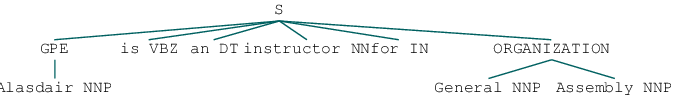

In [15]:
chunks = nltk.ne_chunk(tagged)

chunks


In [16]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Alasdair is an instructor for General Assembly'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

[GPE] Alasdair
[ORGANIZATION] General Assembly


### Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()


In [ ]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()


In [ ]:
# the IDF of each word
idf = tfidf.idf_
print dict(zip(tfidf.get_feature_names(), idf))


In [ ]:
###############
## Exercise ###
###############


# for each sentence in sample, find the most "interesting 
#words" by ordering their tfidf in ascending order


### LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [ ]:
!pip install lda

In [ ]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)


In [ ]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))


In [ ]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [ ]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

In [ ]:
import numpy as np


In [ ]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print '\nLOWEST:\n'
    for sent_score in sorted(sent_scores)[:3]:
        print sent_score[1]

    # highest scoring sentences
    print '\nHIGHEST:\n'
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print sent_score[1]

# try it out!
summarize()

In [ ]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

In [ ]:
from textblob import TextBlob, Word

In [ ]:
# identify words and noun phrases
blob = TextBlob('Liam and Sinan are instructors for General Assembly')
blob.words
blob.noun_phrases

In [ ]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

In [ ]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print TextBlob('Ian and Alasdair are instructors for General Assembly in Sydney').sentiment.subjectivity



In [ ]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

In [ ]:
[word.pluralize() for word in blob.words]


In [ ]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

In [ ]:
# spellcheck
Word('parot').spellcheck()


In [ ]:
# definitions
Word('bank').define()
Word('bank').define('v')

In [ ]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()

### 7. Regular Expressions - Regex

This is the python module for regular expressions: https://docs.python.org/2/library/re.html

Here is a google page for explaining regular expression patterns: https://developers.google.com/edu/python/regular-expressions

And here is a convenient tool for testing regular expressions: https://regex101.com/#python

Have a read of these and play around with regular expressions below and in the regex101 tool